Class distribution (0 = bad, 1 = good):
quality_label
0    5220
1    1277
Name: count, dtype: int64 

✅ Baseline RF Accuracy: 0.8815384615384615
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1567
           1       0.79      0.54      0.64       383

    accuracy                           0.88      1950
   macro avg       0.84      0.75      0.79      1950
weighted avg       0.87      0.88      0.87      1950

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
✅ Tuned RF Accuracy: 0.8871794871794871
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1567
           1       0.81      0.55      0.66       383

    accuracy                           0.89      1950
   macro avg       0.86      0.76      0.79      1950
weighted avg       0.88      0.89      0.88      

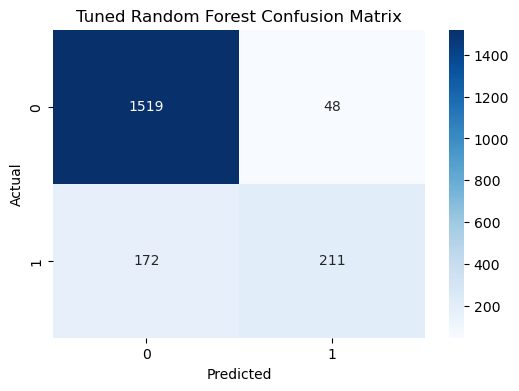

In [4]:
# 1. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 2. Load Data
red = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
    sep=';'
)
white = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
    sep=';'
)
red['type'] = 1
white['type'] = 0
wine = pd.concat([red, white], ignore_index=True)

# 3. Label Engineering
wine['quality_label'] = (wine['quality'] >= 7).astype(int)

# 4. Explore Imbalance
print("Class distribution (0 = bad, 1 = good):")
print(wine['quality_label'].value_counts(), "\n")

# 5. Prepare Features & Labels
X = wine.drop(['quality', 'quality_label'], axis=1)
y = wine['quality_label']

# 6. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Random Forest Baseline
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)
y_pred_rf = rf_base.predict(X_test)

print("✅ Baseline RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 9. Random Forest with GridSearch (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=3, scoring='accuracy', verbose=1
)
grid_rf.fit(X_train, y_train)
print("✅ Best RF params:", grid_rf.best_params_)

y_pred_best = grid_rf.predict(X_test)
print("✅ Tuned RF Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# 10. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()


